<a href="https://colab.research.google.com/github/nikku1234/Tensorflow_examples/blob/master/Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.0.0


In [7]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [8]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 41kB/s 
     |████████████████████████████████| 3.8MB 26.7MB/s 
     |████████████████████████████████| 450kB 37.7MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
#actual weight and bias 2 and 0.9

x = np.linspace(0,3,120)

y = 2 * x + 0.9 +np.random.randn(*x.shape)*0.3

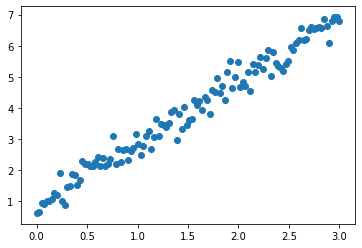

In [5]:
plt.scatter(x,y,label="input data set")

two methods: init and call. Init initializes the weight and bias randomly, and call returns the values, as per the straight line equation y = mx + c

In [0]:
class LinearModel:
    def __call__(self, x):
        return self.Weight * x + self.Bias
    
    def __init__(self):
        self.Weight = tf.Variable(11.0)
        self.Bias = tf.Variable(12.0)

Loss and train functions for the model. 

The train function takes four parameters: linear_model (model instance) , x (independent variable) , y (dependent variable), and lr (learning rate).


The loss function takes two parameters: y (actual value of dependent variable) and pred (predicted value of dependent variable).


Note that we’re using the tf.square function to get the square of the difference of y and the predicted value, and then we’re using the . tf.reduce_mean method to calculate the square root of the mean.


Note that the tf.GradientTape method is used for automatic differentiation, computing the gradient of a computation with respect to its input variables.


Hence, all operations executed inside the context of a tf.GradientTape are recorded.


In [0]:
def loss(y,pred):
  return tf.reduce_mean(tf.square(y-pred))

def train(linear_model,x,y,lr =0.2):
  with tf.GradientTape() as t:
    current_loss = loss(y,linear_model(x))

    lr_weight, lr_bias = t.gradient(current_loss,[linear_model.Weight,linear_model.Bias])
    linear_model.Weight.assign_sub(lr * lr_weight)
    linear_model.Bias.assign_sub(lr * lr_bias)
    

defining the number of epochs as 80 and using a for loop to train the model. Note that we’re printing the epoch count and loss for each epoch using that same for loop. We’ve used 0.12 for learning rate, and we’re calculating the loss in each epoch by calling our loss function inside the for loop as shown below.

In [21]:

linear_model = LinearModel()
Weights, Biases = [], []
epochs = 80
for epoch_count in range(epochs):
    Weights.append(linear_model.Weight.numpy()) 
    Biases.append(linear_model.Bias.numpy())
    real_loss = loss(y, linear_model(x))
    train(linear_model, x, y, lr=0.12)
    print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

Epoch count 0: Loss value: 667.8931274414062
Epoch count 1: Loss value: 10.504701614379883
Epoch count 2: Loss value: 5.232640743255615
Epoch count 3: Loss value: 4.719099521636963
Epoch count 4: Loss value: 4.2844767570495605
Epoch count 5: Loss value: 3.890803813934326
Epoch count 6: Loss value: 3.534022092819214
Epoch count 7: Loss value: 3.2106740474700928
Epoch count 8: Loss value: 2.9176254272460938
Epoch count 9: Loss value: 2.6520376205444336
Epoch count 10: Loss value: 2.411336660385132
Epoch count 11: Loss value: 2.1931912899017334
Epoch count 12: Loss value: 1.9954876899719238
Epoch count 13: Loss value: 1.8163098096847534
Epoch count 14: Loss value: 1.6539223194122314
Epoch count 15: Loss value: 1.506751537322998
Epoch count 16: Loss value: 1.3733716011047363
Epoch count 17: Loss value: 1.2524902820587158
Epoch count 18: Loss value: 1.1429364681243896
Epoch count 19: Loss value: 1.0436482429504395
Epoch count 20: Loss value: 0.953664243221283
Epoch count 21: Loss value: 0.8

In [24]:
linear_model.Weight.numpy(),linear_model.Bias.numpy()

(1.9511032, 0.97406024)

In [0]:
RMSE = loss(y,linear_model(x))

In [28]:
RMSE.numpy()

0.08575018

In [0]:
 Reference - https://heartbeat.fritz.ai/linear-regression-using-tensorflow-2-0-1cd51e211e1f